In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer 
from sklearn.compose import ColumnTransformer


In [ ]:
df=pd.read_csv('/content/titanic.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [ ]:
Y_train

826    0
838    1
763    1
189    0
109    1
      ..
277    0
817    0
255    1
320    0
836    0
Name: Survived, Length: 712, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age QQ plot')

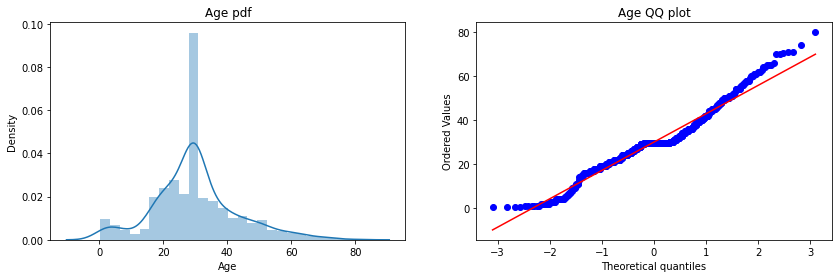

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age pdf')
plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fare QQ plot')

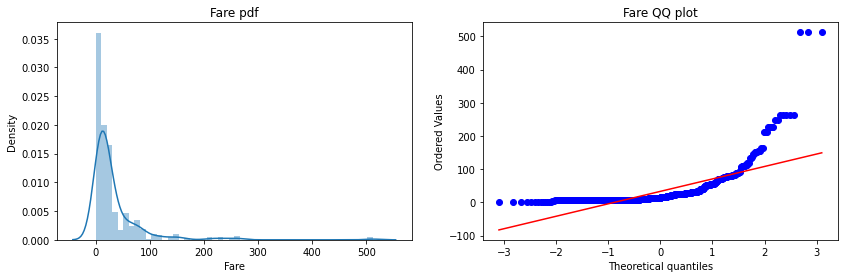

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare pdf')
plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot')

In [ ]:
#using algorithm without using log transform
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,Y_train)
clf1.fit(X_train,Y_train)

y_prdict=clf.predict(X_test)
y_prdict1=clf1.predict(X_test)

print('Accuracy_score LR',accuracy_score(Y_test,y_prdict))
print('Accuracy_score DT',accuracy_score(Y_test,y_prdict1))




Accuracy_score LR 0.6536312849162011
Accuracy_score DT 0.6480446927374302


In [ ]:
#after log transform
trf=FunctionTransformer(np.log1p)

In [ ]:
X_train_transform=trf.fit_transform(X_train)
X_test_transform=trf.fit_transform(X_test)

In [ ]:
clf.fit(X_train_transform,Y_train)
clf1.fit(X_train_transform,Y_train)

y_prdict=clf.predict(X_test)
y_prdict1=clf1.predict(X_test)

print('Accuracy_score LR',accuracy_score(Y_test,y_prdict))
print('Accuracy_score DT',accuracy_score(Y_test,y_prdict1))


Accuracy_score LR 0.6983240223463687
Accuracy_score DT 0.6089385474860335


In [ ]:
#cross value score
X_transform=trf.fit_transform(x)

print('LR',np.mean(cross_val_score(clf,X_transform,y,scoring='accuracy',cv=10)))
print('DT',np.mean(cross_val_score(clf1,X_transform,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6588264669163545


Text(0.5, 1.0, 'Fare after log transform QQ plot')

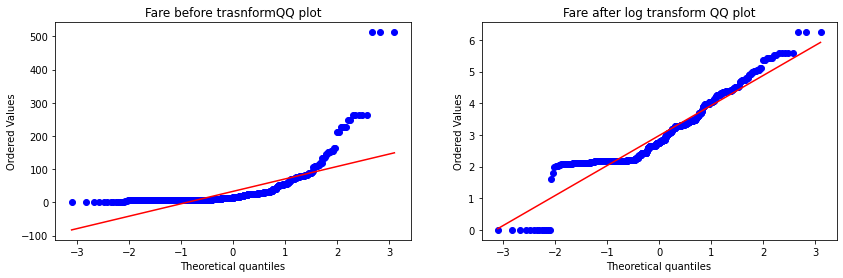

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare before trasnformQQ plot')
plt.subplot(122)
stats.probplot(X_train_transform['Fare'],dist='norm',plot=plt)
plt.title('Fare after log transform QQ plot')

Text(0.5, 1.0, 'Age after log transform QQ plot')

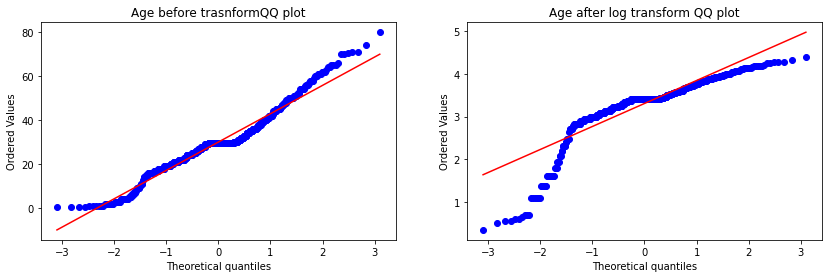

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age before trasnformQQ plot')
plt.subplot(122)
stats.probplot(X_train_transform['Age'],dist='norm',plot=plt)
plt.title('Age after log transform QQ plot')

age is already normal so we perform transform onlyu in fare column


In [ ]:
#column transform
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')


In [ ]:
X_train_Fare=trf2.fit_transform(X_train)
X_test_Fare=trf2.fit_transform(X_test)

In [ ]:
clf.fit(X_train_Fare,Y_train)
clf1.fit(X_train_Fare,Y_train)

y_prdict=clf.predict(X_test_Fare)
y_prdict1=clf1.predict(X_test_Fare)

print('Accuracy_score LR',accuracy_score(Y_test,y_prdict))
print('Accuracy_score DT',accuracy_score(Y_test,y_prdict1))

Accuracy_score LR 0.6703910614525139
Accuracy_score DT 0.6424581005586593


In [ ]:
#other transform

def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6442446941323345


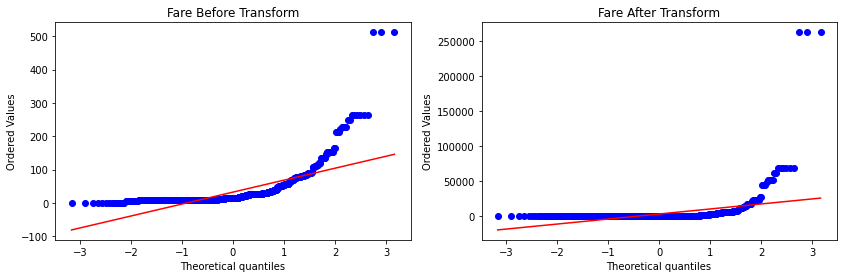

In [ ]:
apply_transform(lambda x:x**2)